<a href="https://colab.research.google.com/github/sevafacer/SE/blob/main/lab1SE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [ ]:
def F(t, Y):
  x, y = Y
  dydt =[y, 5*(x**2)- (x**4) - 4]
  return dydt

def eq_quiver(F, limits, N = 16):
  xlims, ylims = limits
  xs = np.linspace(xlims[0], xlims[1], N)
  ys = np.linspace(ylims[0], ylims[1], N)
  U = np.zeros((N, N))
  V = np.zeros((N, N))
  for i, y in enumerate(ys):
    for j , x in enumerate(xs):
      U[i][j], V[i][j] = F(.0, [x, y])
  return xs, ys, U, V

def plotVfield(limits):
  xlims, ylims = limits
  plt.xlim([xlims[0], xlims[1]])
  plt.ylim([ylims[0], ylims[1]])
  xs, ys, U, V = eq_quiver(F, limits, 16)
  plt.quiver(xs, ys, U, V, alpha = 0.6)
 
def plotPoints(points):
  for point in points:
    if point['stable']:
      style = 'bo'
    else:
      style = 'rx'
    plt.plot(point['x'], point['y'], style)

def plotter(points, times, style):
  tmp = list(times)
  for i in range(2):
    sol = solve_ivp(F, tmp, (points[0], points[1]), method = 'RK45',rtol=1e-6)
    xs, ys = sol.y
    plt.plot(xs, ys, style)
    tmp[1] = - tmp[1]

def plotTrajectory(points, times, style):
  for point in points:
    plotter(point, times, style)    

def plotterSeps(points, times, style):
  tmp = list(times)
  sol = solve_ivp(F, tmp, (points[0], points[1]), method = 'RK45',rtol=1e-6)
  xs, ys = sol.y
  plt.plot(xs, ys, style)

def plotSeps(points, times):
      for point in points:
        if not point['stable']:
            print(point['x'])
            matrix = np.array([[0, 1], [(-4*(point['x'])**3 + 10*point['x'] ), 0]])
            vectors = np.linalg.eigh(matrix)[1] / 1000
            print(matrix, '\n', vectors)

            tmp = list(times)
            plotterSeps((point['x'] + vectors[1][0], point['y'] + vectors[1][1]), tmp, 'y-')
            plotterSeps((point['x'] - vectors[1][0], point['y'] - vectors[1][1]), tmp, 'y-')

            #tmp[1] = -tmp[1]
            #plotterSeps((point['x'] + vectors[0][0], point['y'] + vectors[0][1]), tmp, 'y-')
            #plotterSeps((point['x'] - vectors[0][0], point['y'] - vectors[0][1]), tmp, 'y-')

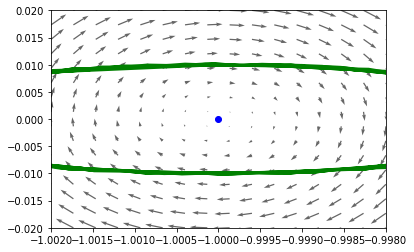

In [ ]:
limits = [(-1.002,-0.998),(-0.02,0.02)]
##limits =[(-2.8,2.8), (-3,3)]
times = (0,15)
sep_times = (0,2)

eq_points = [{'x' : -2,'y' : 0, 'stable' : False}, 
             {'x' : -1,'y' : 0, 'stable' : True},
             {'x' : 1,'y' : 0, 'stable' : False},
             #{'x' : 2,'y' : 0, 'stable' : True} 
              ]
s_points = [(-1.0, 0.5), (2.0,0.5), (-1.0, 1.0), (2.0,1.0), (-0.9990,0.010)]
inf_points = [(1, 0.25),(-2 , 0.25),(0.0,0.0),(0.5,0.0),(1.0,1.0),(-2.2,0),(-2.3,0),(-2,0.005)] 

plotVfield(limits) #Векторное поле
plotPoints(eq_points) #Состояния равновесия
plotTrajectory(s_points, times, 'g-') #Замкнутыне траектории
#plotTrajectory(inf_points, times, 'r-') #Траектории на бесконечность
#plotSeps(eq_points, sep_times) #Сепаратрисы(хуйня)